# SkyInsight: Predictive Analytics for Cost-Effective Air Travel"

by: Mark Dunlea Tate, Laundry Houston, Anthony Amadasun

---

### Introduction

This section explores the intricate details of flight prices, exploring various factors that affect price variation. We examine how different airlines employ various pricing strategies to attract customers and maximize their profits. Our analysis covers aspects such as airline preferences, departure times, destinations, and more. We aim to gain insights into the patterns and correlations within the dataset, providing a comprehensive understanding of how different features influence flight prices.

---

### 1.2 Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# data url = 'https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data'

In [3]:
df = pd.read_csv('../data/raw_dataset.csv')
df.drop(columns=['Unnamed: 0', 'days_left'], inplace=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,5955


---

### 1.3 Data Cleaning

In [4]:
df["price"] = round(df["price"] * 0.12 / 10, 2)
df["duration"] = round(df["duration"] * 60, 0).astype(int)
df["stops"].replace({"zero": 0, "one": 1, "two_or_more": 2}, inplace=True)
df["class"].replace({"Economy": 0, "Business": 1}, inplace=True)
df.rename(columns={'source_city': 'origin', 'destination_city': 'destination'}, inplace=True)

In [5]:
df.isnull().sum()

airline           0
flight            0
origin            0
departure_time    0
stops             0
arrival_time      0
destination       0
class             0
duration          0
price             0
dtype: int64

In [6]:
df.head()

,airline,flight,origin,departure_time,stops,arrival_time,destination,class,duration,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,130,71.44
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,140,71.44
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,130,71.47
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,135,71.46
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,140,71.46


### 1.4 Data Transformation

In [7]:
df['duration'].describe()


count    300153.000000
mean        733.259055
std         431.518381
min          50.000000
25%         410.000000
50%         675.000000
75%         970.000000
max        2990.000000
Name: duration, dtype: float64

In [8]:
#feature engineering
#new feature for the time of day based based of the depature_time

#specify the range for the labels based on the quartiles
duration_bin_edges = [50, 410, 675, 970, 2990] 

#define label for each bin
duration_labels = ['Short', 'Medium', 'Long', 'Very Long']

#create the duration range feature
df['duration_range'] = pd.cut(df['duration'], 
                              bins= duration_bin_edges,
                             labels=duration_labels,
                             include_lowest=True)

In [9]:
df.dtypes

airline             object
flight              object
origin              object
departure_time      object
stops                int64
arrival_time        object
destination         object
class                int64
duration             int64
price              float64
duration_range    category
dtype: object

In [10]:
# Convert 'departure_time' to categorical dtype
df['departure_time'] = pd.Categorical(df['departure_time'])

# Ordinal encoding
df['departure_time_encoded'] = df['departure_time'].cat.codes


In [11]:
#ordinal encoding
df['duration_range_encoded'] = df['duration_range'].cat.codes


In [12]:
#one hot encode
df = pd.get_dummies(df, columns=['destination'],
                    prefix='destination', dtype=int,
                   drop_first=False)

In [13]:
df.head()

,airline,flight,origin,departure_time,stops,arrival_time,class,duration,price,duration_range,departure_time_encoded,duration_range_encoded,destination_Bangalore,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,0,130,71.44,Short,2,0,0,0,0,0,0,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,0,140,71.44,Short,1,0,0,0,0,0,0,1
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,0,130,71.47,Short,1,0,0,0,0,0,0,1
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,0,135,71.46,Short,4,0,0,0,0,0,0,1
4,Vistara,UK-963,Delhi,Morning,0,Morning,0,140,71.46,Short,4,0,0,0,0,0,0,1


---

### 1.5 Summary/Visuals

#### Average airline price EDA

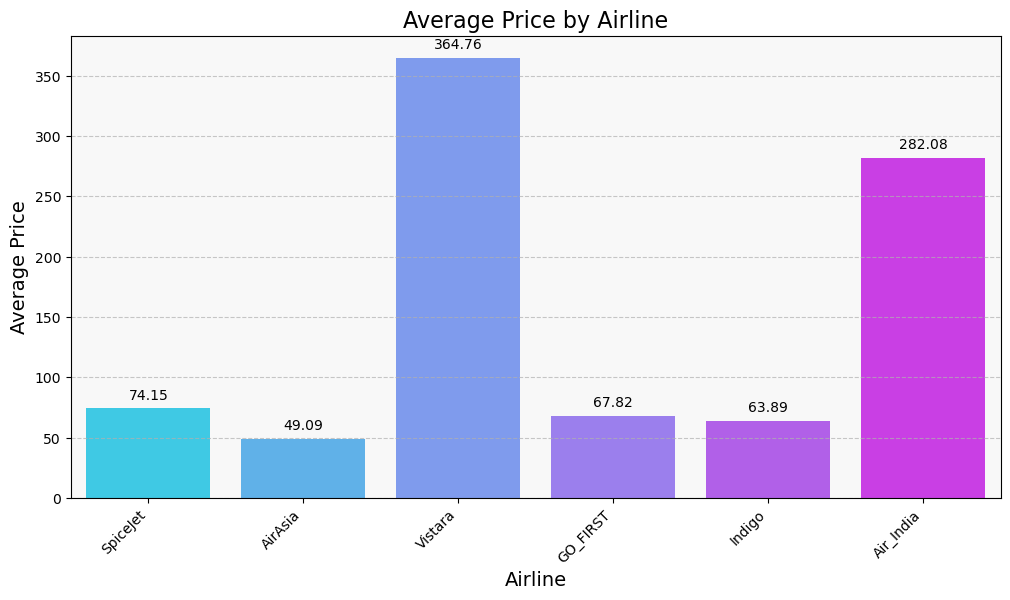

In [23]:
temp1_list = []
temp2_list = []
for i in df['airline'].unique():
    #print(f"airline {i} average price is {df.groupby('airline').get_group(i)['price'].mean()}")
    temp1_list.append(i)
    temp2_list.append(df.groupby('airline').get_group(i)['price'].mean())

plt.figure(figsize=(12, 6))
sns.barplot(x=temp1_list, y=temp2_list, palette='cool')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Airline', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price by Airline', fontsize=16)

# Add data labels on top of each bar
for i, v in enumerate(temp2_list):
    plt.text(i, v + 5, round(v, 2), ha='center', va='bottom', fontsize=10)
    
plt.gca().set_facecolor('#f8f8f8')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../images/Average_price_airline.png', bbox_inches='tight')

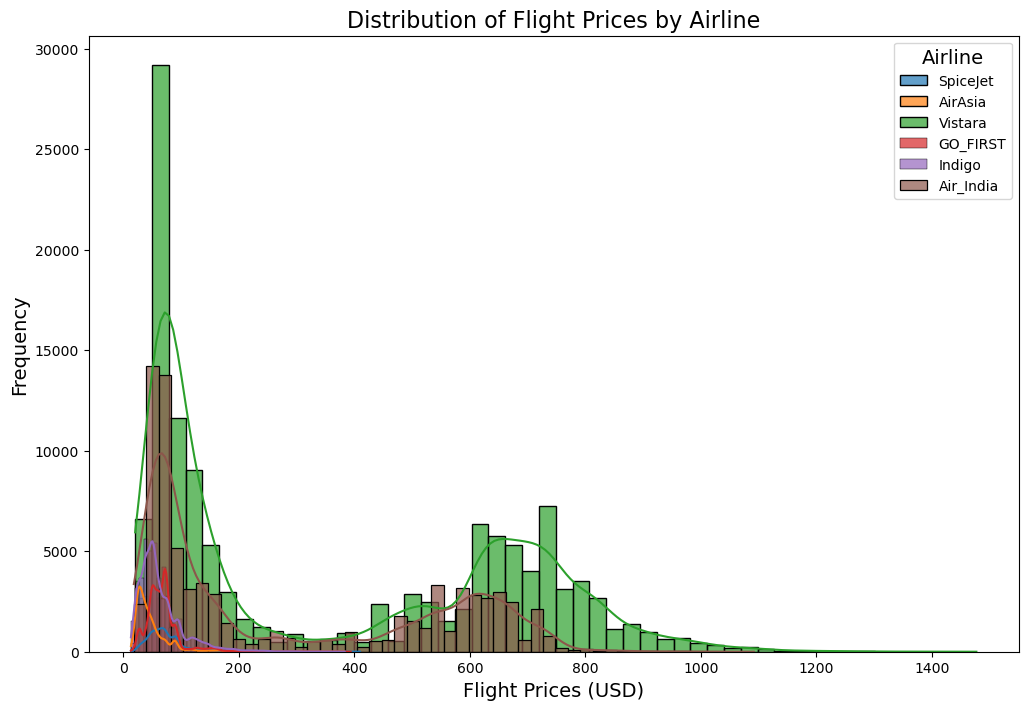

In [24]:
plt.figure(figsize=(12, 8)) 

for i, airline in enumerate(df['airline'].unique()):
    prices = df.groupby('airline').get_group(airline)['price']
    sns.histplot(prices, bins=50, label=airline, alpha=0.7, color=plt.cm.tab10(i), kde=True)
    
plt.xlabel('Flight Prices (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Flight Prices by Airline', fontsize=16)
plt.legend(title='Airline', title_fontsize='14', fontsize='10', loc='upper right')
plt.savefig('../images/distribution_price_airline.png', bbox_inches='tight')

**Interpretation:**

- The airline Vistara has the highest average ticket price among all other airline in India, this may appeal to customers who is looking for a more luxurious travel experience. Air India also position itself as a premium airline that offers premium service and amenities.
- AirAsia standouts as the lowest average ticket price, making it at attractive option for budget-conscious travelers
- Indigo, Spicejet, and GO_FIRST offer competitive average pricing, making them potential choices for cost-sensitive travelers and travelers looking for a combination of affordability and service.

The 2nd chart(histogram) illustrates how flight prices vary across different airlines. SpiceJet, AirAsia, GO_FIRST, and Indigo histogram shows a concentration of lower-priced flights, indicating a focus on budget friendly option. While Vistera and Air India pricing distribution is more spread out, with a significant presence in the mid to higher price ranges. These two airline highlights a  a diverse set of flight options catering to different preferences.

#### Average price by Origin City EDA

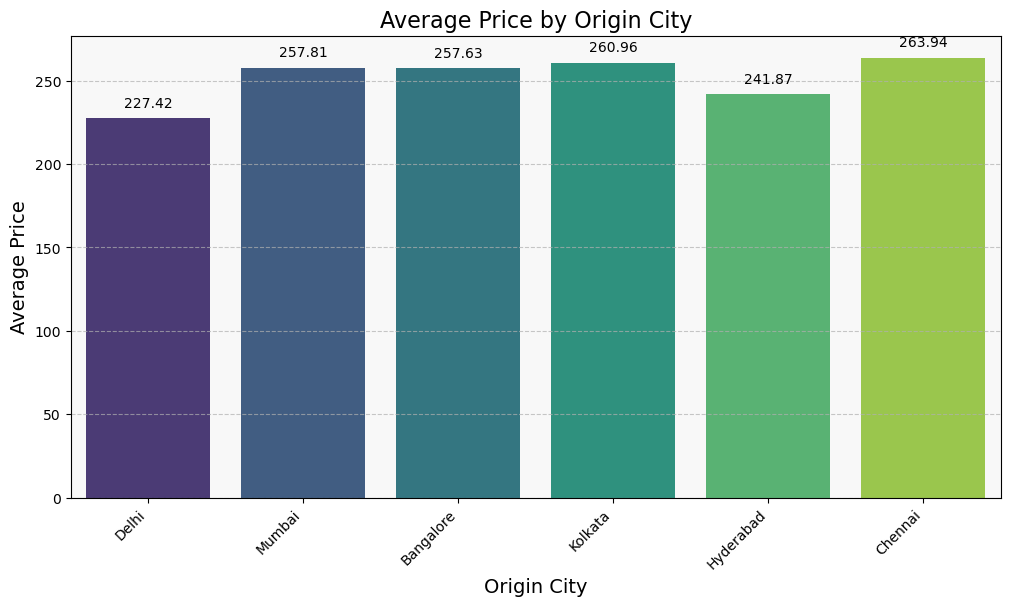

In [25]:
temp3_list = []
temp4_list = []
for i in df['origin'].unique():
    #print(f"from city {i} average price is {df.groupby('origin').get_group(i)['price'].mean()}")
    temp3_list.append(i)
    temp4_list.append(df.groupby('origin').get_group(i)['price'].mean())
    
plt.figure(figsize=(12, 6))
sns.barplot(x=temp3_list, y=temp4_list, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Origin City', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price by Origin City', fontsize=16)

#Add data labels on top of each bar
#code logic : https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart
for i, v in enumerate(temp4_list):
    plt.text(i, v + 5, round(v, 2), ha='center', va='bottom', fontsize=10)

#change plot background
plt.gca().set_facecolor('#f8f8f8')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../images/Average_price_origin_city.png', bbox_inches='tight')




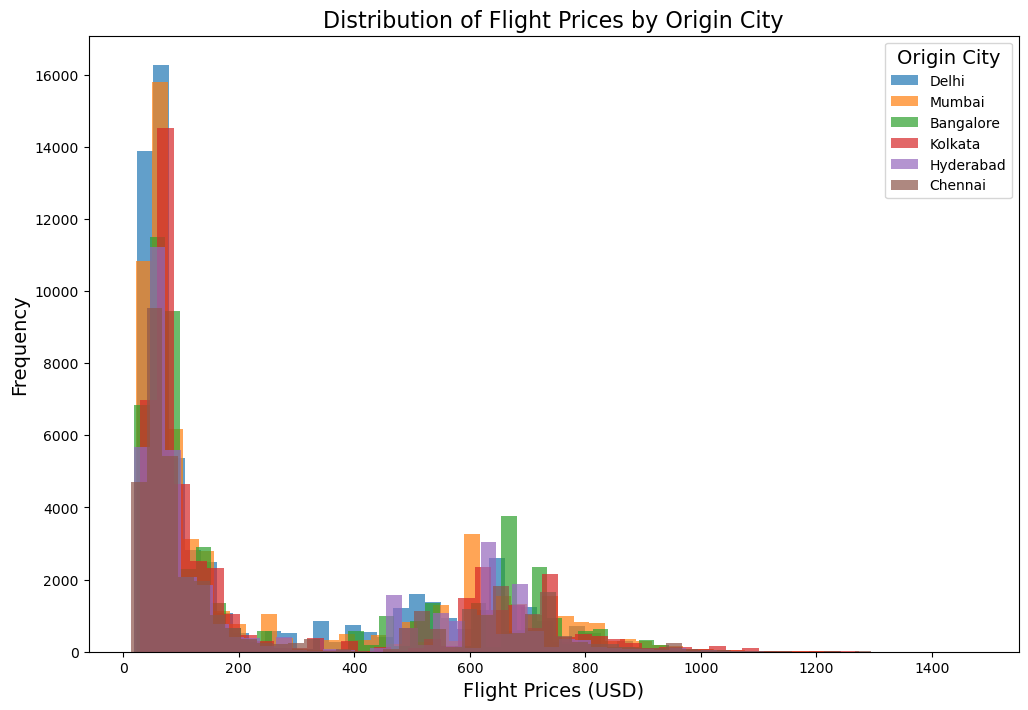

In [26]:
plt.figure(figsize=(12, 8))

for i, origin in enumerate(df['origin'].unique()):
    prices = df.groupby('origin').get_group(origin)['price']
    plt.hist(prices, bins=50, label=origin, alpha=0.7, color=plt.cm.tab10(i))#sns visual conflict, have to use plt.hist
    
plt.xlabel('Flight Prices (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Flight Prices by Origin City', fontsize=16)
plt.legend(title='Origin City', title_fontsize='14', fontsize='10', loc='upper right')
plt.savefig('../images/distribution_price_origin_city.png', bbox_inches='tight')

**Interpretation:**

- Delhi: average flight price from Delhi is approximately 227.42
- Mumbai: average flight price of around 257.81.
- Bangalore: the average price is approximately 257.63.
- Kolkata: average flight price of about 260.96.
- Hyderabad: average price of around 241.87.
- Chennai: average flight price is approximately 263.94.

The 2nd chart (histogram) illustrates the distribution of flight prices across different origin cities. Each color-coded bar corresponds to a specific city, which helps provide insights into the variation in pricing patterns.The majority of flights from each city falls between the 50 and 200 range. Flights from Bangalore and Mumbai displays a bimodal distribution, indicating two distinct groups of flight prices. There's a notable cluster of lower-priced flights, while another cluster suggests higher-priced options. Cities like Delhi and Kolkata show a skewed distribution towards the lower price range, indicating a prevalence of budget-friendly options. However, Kolkata have some higher-priced flights, contributing to a wider spread in pricing. Chennai and Hyderabad suggests a relatively even distribution of flight prices, with no prominent peaks, suggesting a balanced spread of prices for flights


#### Average Price by Depature Time EDA

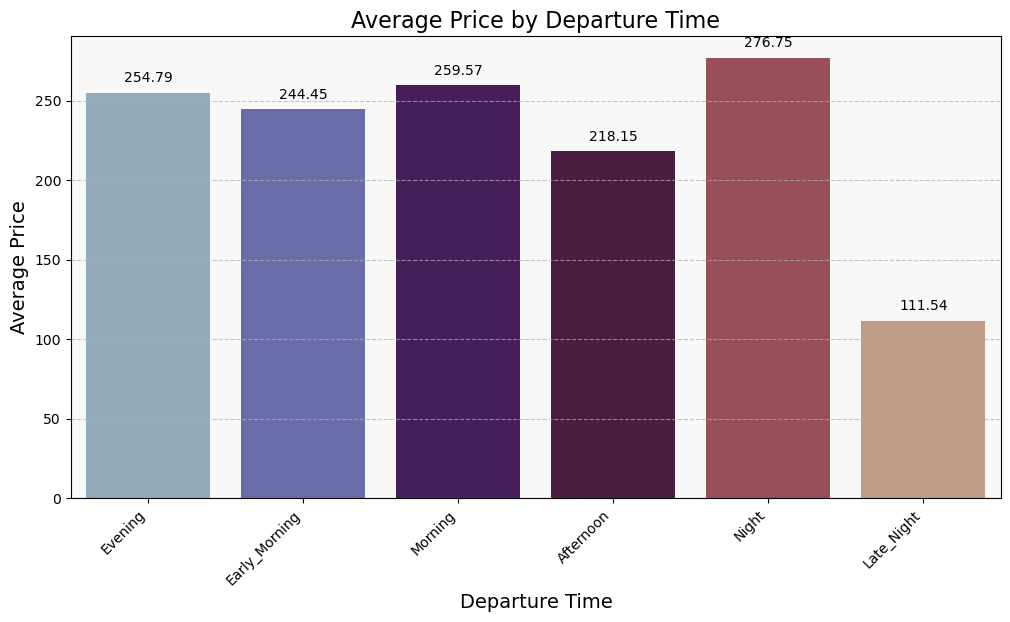

In [27]:
temp5_list = []
temp6_list = []

for i in df['departure_time'].unique():
    #print(f"departure time {i} average price is {df.groupby('departure_time').get_group(i)['price'].mean()}")
    temp5_list.append(i)
    temp6_list.append(df.groupby('departure_time').get_group(i)['price'].mean())

plt.figure(figsize=(12, 6))
sns.barplot(x=temp5_list, y=temp6_list, palette='twilight')


plt.xticks(rotation=45, ha='right')

plt.xlabel('Departure Time', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price by Departure Time', fontsize=16)

# Add data labels on top of each bar
for i, v in enumerate(temp6_list):
    plt.text(i, v + 5, round(v, 2), ha='center', va='bottom', fontsize=10)

# Customize background color and gridlines
plt.gca().set_facecolor('#f8f8f8')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../images/Average_price_departure_time.png', bbox_inches='tight')




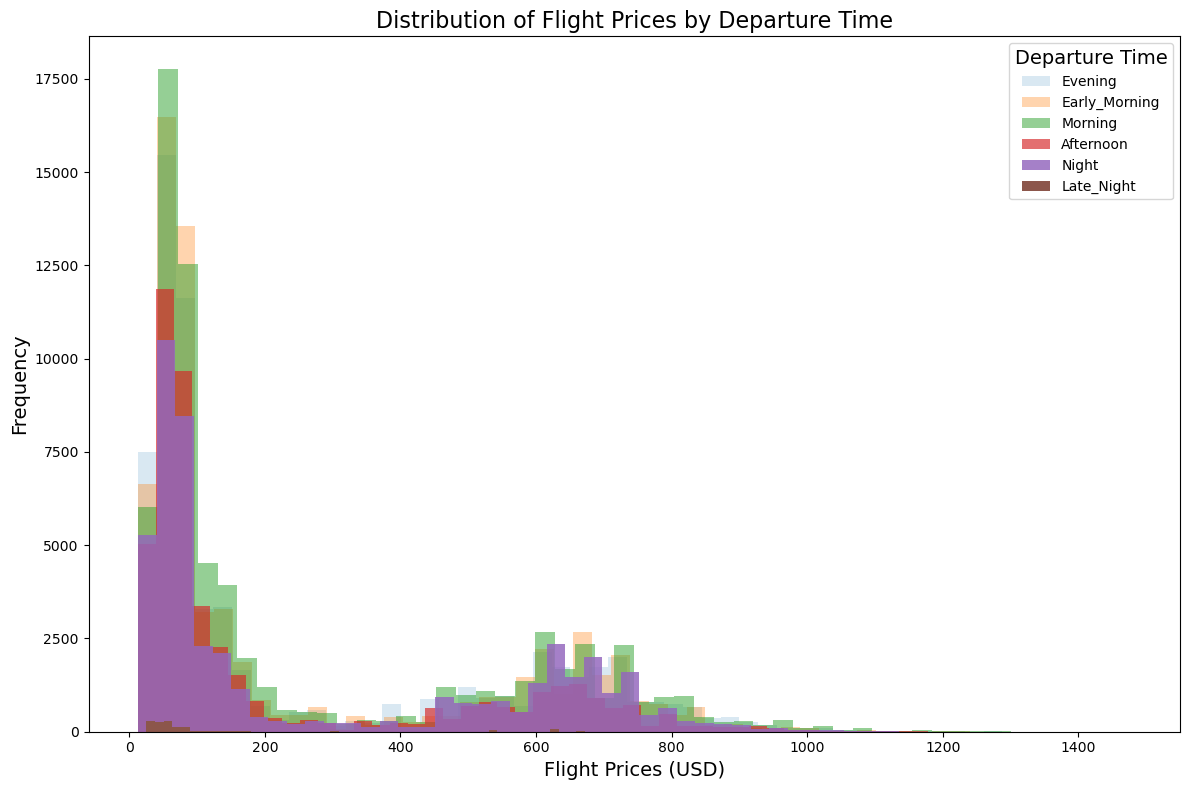

In [28]:
count = 0

plt.figure(figsize=(12, 8))
for i, departure_time in enumerate(df['departure_time'].unique()):
    count += 1
    prices = df.groupby('departure_time').get_group(departure_time)['price']
    plt.hist(prices, bins=50, label=departure_time, alpha=count / (len(df['departure_time'].unique())))

plt.xlabel('Flight Prices (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Flight Prices by Departure Time', fontsize=16)

plt.legend(title='Departure Time', title_fontsize='14', fontsize='10', loc='upper right')

plt.tight_layout()
plt.savefig('../images/distribution_price_departure_time.png', bbox_inches='tight')




**Interpretation:**

The bar chart shows that late night flights are cheapest and early night flight are most expensive. 
- Evening:  average price is 254.79
- Early_Morning:  average price is 244.45
- Morning: average price is 259.57
- Afternoon: average price is 218.15
- Night: average price is 276.74
- Late_Night: average price is 111.54

The histogram shows the distribution of flight prices for different departure times. The plot shows that flight price in the morning andafternoon tend to be cheaper than flights in evening and nights.


#### Correlation Matrix

In [20]:
columns_for_corr = ['stops', 'class', 
                    'price', 'departure_time_encoded', 
                    'duration_range_encoded', 'destination_Bangalore',
                   'destination_Chennai','destination_Delhi',
                   'destination_Hyderabad', 'destination_Kolkata',
                   'destination_Mumbai']

corr_matrix = df[columns_for_corr].corr()
corr_matrix

,stops,class,price,departure_time_encoded,duration_range_encoded,destination_Bangalore,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
stops,1.000000,0.001027,0.119648,-0.031022,0.442084,0.014727,0.060865,-0.104565,0.029073,0.062722,-0.046849
class,0.001027,1.000000,0.937860,0.053340,0.166950,0.005593,0.012331,-0.021200,0.007564,-0.012987,0.010573
price,0.119648,0.937860,1.000000,0.058319,0.231475,0.014050,0.018473,-0.052527,-0.008292,0.020956,0.010534
departure_time_encoded,-0.031022,0.053340,0.058319,1.000000,0.108320,-0.004885,-0.004448,0.014537,0.006081,-0.008285,-0.003550
duration_range_encoded,0.442084,0.166950,0.231475,0.108320,1.000000,-0.004186,0.062580,-0.113957,0.069288,0.047905,-0.042666
destination_Bangalore,0.014727,0.005593,0.014050,-0.004885,-0.004186,1.000000,-0.178489,-0.220083,-0.184467,-0.201301,-0.224194
destination_Chennai,0.060865,0.012331,0.018473,-0.004448,0.062580,-0.178489,1.000000,-0.191601,-0.160594,-0.175249,-0.195180
destination_Delhi,-0.104565,-0.021200,-0.052527,0.014537,-0.113957,-0.220083,-0.191601,1.000000,-0.198018,-0.216088,-0.240664
destination_Hyderabad,0.029073,0.007564,-0.008292,0.006081,0.069288,-0.184467,-0.160594,-0.198018,1.000000,-0.181119,-0.201717
destination_Kolkata,0.062722,-0.012987,0.020956,-0.008285,0.047905,-0.201301,-0.175249,-0.216088,-0.181119,1.000000,-0.220125


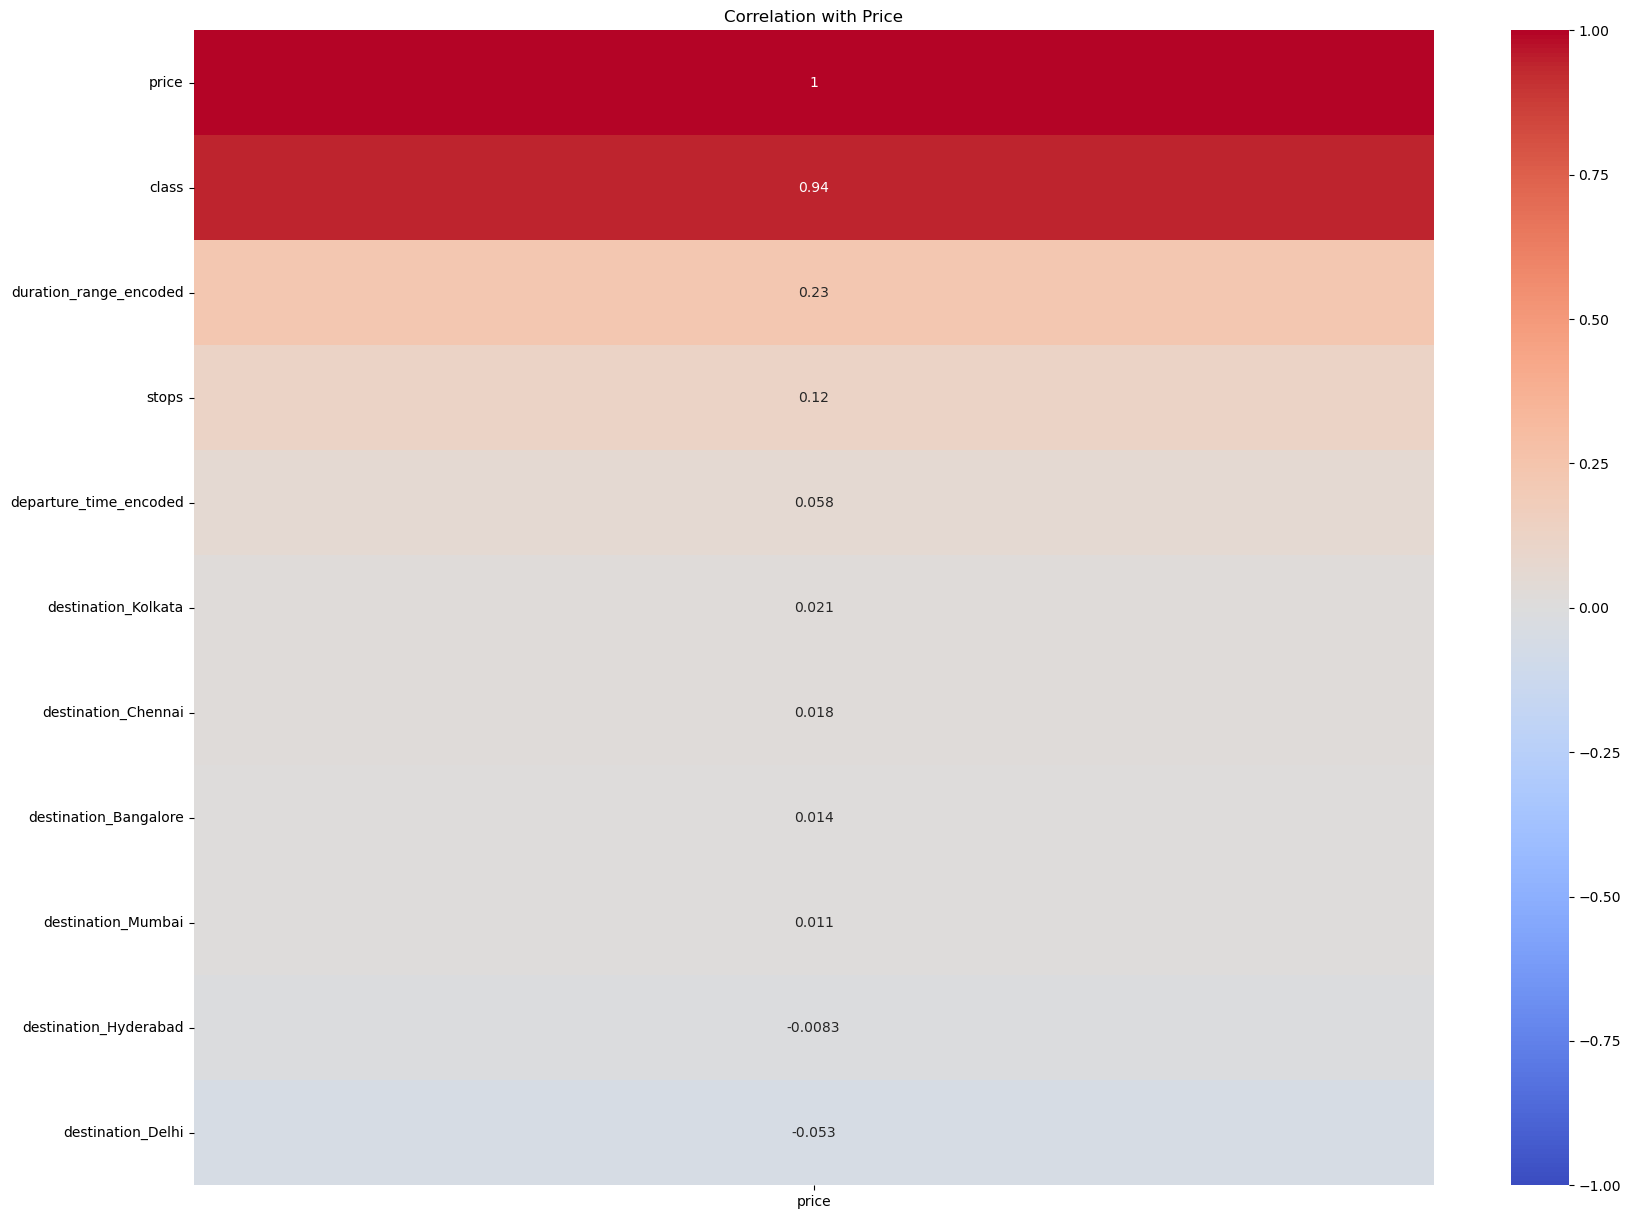

In [29]:
plt.figure(figsize=(20, 15))
plt.title('Correlation with Price')

heatmap = sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False),
                      cmap='coolwarm',
                      vmin=-1,
                      vmax=1,
                      annot=True)
plt.savefig('../images/correlation_price.png', bbox_inches='tight')

**Interpretation:**

The class and duration range are the most strongly correlated with flight prices, indicating that these factors have a more significant impact on the variation in flight prices. The number of stops and specific destinations show weaker correlations, implying a less direct influence on flight prices.


**Save dataset to data folder**

In [22]:
df.to_csv('../data/clean_dataset.csv', index=False)